In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
from datetime import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
df_cards = pd.read_csv('../data/cards_data.csv')
df_users = pd.read_csv('../data/users_data.csv')

# **Data preprocessing**

In [4]:
df_cards.drop(columns=['card_on_dark_web'], inplace=True)

### **current_age since we have birth_year and birth_month to get estimate about age rather than making a new column so we will drop it**

In [5]:
current_year = datetime.now().year
current_month = datetime.now().month
df_users['current_age'] = (current_year - df_users['birth_year']) - (df_users['birth_month'] > current_month).astype(int)

In [6]:
df_cards['credit_limit'] = df_cards['credit_limit'].str.replace(r'[\$,]', '', regex=True).astype(float)
df_users['per_capita_income'] = df_users['per_capita_income'].str.replace(r'[\$,]', '', regex=True).astype(float)
df_users['yearly_income'] = df_users['yearly_income'].str.replace(r'[\$,]', '', regex=True).astype(float)
df_users['total_debt'] = df_users['total_debt'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [7]:
df_cards['acct_open_date'] = pd.to_datetime(df_cards['acct_open_date'], format="%m/%Y", errors='coerce')

In [8]:
# Determine retirement status
df_users['retirement_status'] = np.where(
    df_users['current_age'] >= df_users['retirement_age'],
    'Retired',
    'Not Retired'
)

# **Merging both tables for ease of analysis OLAP**

In [9]:
df_merged = pd.merge(df_users, df_cards, left_on="id", right_on="client_id", how="left")
df_merged.head()

,id_x,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,...,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
0,825,58,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,...,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295.0,2002-09-01,2008
1,825,58,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,...,Visa,Debit,4956965974959986,12/2020,393,YES,2,21968.0,2014-04-01,2014
2,825,58,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,...,Visa,Debit,4582313478255491,02/2024,719,YES,2,46414.0,2003-07-01,2004
3,825,58,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,...,Visa,Credit,4879494103069057,08/2024,693,NO,1,12400.0,2003-01-01,2012
4,825,58,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,...,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,28.0,2008-09-01,2009


In [10]:
# Check for duplicated rows
df_duplicated = df_merged[df_merged.duplicated()]
print(df_duplicated)

Empty DataFrame
Columns: [id_x, current_age, retirement_age, birth_year, birth_month, gender, address, latitude, longitude, per_capita_income, yearly_income, total_debt, credit_score, num_credit_cards, retirement_status, id_y, client_id, card_brand, card_type, card_number, expires, cvv, has_chip, num_cards_issued, credit_limit, acct_open_date, year_pin_last_changed]
Index: []

[0 rows x 27 columns]


In [11]:
# Print schema
df_merged.dtypes

id_x                              int64
current_age                       int64
retirement_age                    int64
birth_year                        int64
birth_month                       int64
gender                           object
address                          object
latitude                        float64
longitude                       float64
per_capita_income               float64
yearly_income                   float64
total_debt                      float64
credit_score                      int64
num_credit_cards                  int64
retirement_status                object
id_y                              int64
client_id                         int64
card_brand                       object
card_type                        object
card_number                       int64
expires                          object
cvv                               int64
has_chip                         object
num_cards_issued                  int64
credit_limit                    float64


In [12]:
df_merged.describe()  # Describe numeric columns

,id_x,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,id_y,client_id,card_number,cvv,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed
count,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000,6146,6146.000000
mean,994.939636,55.139766,66.544582,1969.050439,6.467296,37.314732,-91.801489,23254.139440,45313.309795,57644.721445,718.252522,3.945005,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,14347.493980,2011-01-15 12:55:31.727953152,2013.436707
min,0.000000,23.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,0.000000,1.000000,0.000000,480.000000,1.000000,0.000000,0.000000,3.001055e+14,0.000000,1.000000,0.000000,1991-01-01 00:00:00,2002.000000
25%,492.250000,40.000000,65.000000,1957.000000,3.000000,33.820000,-97.510000,16844.000000,32295.000000,16803.000000,687.000000,3.000000,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,7042.750000,2006-10-01 00:00:00,2010.000000
50%,992.000000,55.000000,67.000000,1970.000000,7.000000,38.160000,-86.795000,20646.500000,40251.000000,51529.500000,717.500000,4.000000,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,12592.500000,2010-02-15 00:00:00,2013.000000
75%,1495.000000,68.000000,69.000000,1984.000000,10.000000,41.130000,-80.130000,26369.000000,52531.500000,84494.500000,760.000000,5.000000,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,19156.500000,2016-05-01 00:00:00,2017.000000
max,1999.000000,106.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,163145.000000,307018.000000,516263.000000,850.000000,9.000000,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,151223.000000,2020-02-01 00:00:00,2020.000000
std,578.614626,18.975960,3.455030,18.969825,3.547927,5.148899,16.454556,11512.323216,23314.172216,51633.885249,63.227622,1.668031,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,12014.463884,NaN,4.270699


In [13]:
df_merged.select_dtypes(include=['int64']).describe()  # Only integers

,id_x,current_age,retirement_age,birth_year,birth_month,credit_score,num_credit_cards,id_y,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,994.939636,55.139766,66.544582,1969.050439,6.467296,718.252522,3.945005,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,578.614626,18.975960,3.455030,18.969825,3.547927,63.227622,1.668031,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,23.000000,50.000000,1918.000000,1.000000,480.000000,1.000000,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,492.250000,40.000000,65.000000,1957.000000,3.000000,687.000000,3.000000,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,992.000000,55.000000,67.000000,1970.000000,7.000000,717.500000,4.000000,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,1495.000000,68.000000,69.000000,1984.000000,10.000000,760.000000,5.000000,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,1999.000000,106.000000,79.000000,2002.000000,12.000000,850.000000,9.000000,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


In [14]:
df_merged.select_dtypes(include=['object']).head()  # Only strings

,gender,address,retirement_status,card_brand,card_type,expires,has_chip
0,Female,462 Rose Lane,Not Retired,Visa,Debit,12/2022,YES
1,Female,462 Rose Lane,Not Retired,Visa,Debit,12/2020,YES
2,Female,462 Rose Lane,Not Retired,Visa,Debit,02/2024,YES
3,Female,462 Rose Lane,Not Retired,Visa,Credit,08/2024,NO
4,Female,462 Rose Lane,Not Retired,Mastercard,Debit (Prepaid),03/2009,YES


# **Analyzing Association Between Categorical Variables**
## Chi-square Statistic
### When dealing with counts and investigating how far the observed counts are from the expected counts, we use a test statistic called the chi-square ($ \chi^2 $) statistic.
$$
X^2 = \chi^2_{\text{stat}} = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i}
$$

### Squaring the difference between the observed and the expected outcome does two things:
- Any standardized difference that is squared will now be positive.
- Differences that already looked unusual will become much larger after being
squared.

### p-value: (probability value) -- how likely is it that your data would have occurred by random chance if is true

### The p-value for a chi-square test is defined as the tail area above the calculated test statistic.

### Conditions for the Chi-square Test
1. Independence: Each case that contributes a count to the table must be
independent of all the other cases in the table.
2. Sample size: Each particular scenario (i.e. "cell") must have at least 5
expected cases.
3. df ≥ 1: Degrees of freedom must be at least 1.



### Now let's check for association between some categorical variables 

### Determine if gender affects card brand

In [19]:
# Step 1: Hypotheses
H0 = "Gender and Card Brand are independent. Gender does not affect Card Brand."
HA = "Gender and Card Brand are dependent. Gender affects Card Brand."

print("Null Hypothesis (H0):", H0)
print("Alternative Hypothesis (HA):", HA)

# Step 2: Create Contingency Table Manually
contingency_table = df_merged.groupby(["gender", "card_brand"]).size().reset_index(name="count")

# Reshape the table into a matrix format
contingency_matrix = contingency_table.pivot(index="gender", columns="card_brand", values="count").fillna(0)

print("\nContingency Table:\n", contingency_matrix)

# Step 3: Perform Chi-Squared Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_matrix)

# Step 4: Print Results
print("\nChi-Squared Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-Value:", p_value)

# Step 5: Conclusion
alpha = 0.05  # Significance Level
if p_value < alpha:
    print("\nSince p-value is low, we reject H0.")
    print("Conclusion: The data provides convincing evidence that Gender and Card Brand are dependent.")
else:
    print("\nSince p-value is high, we fail to reject H0.")
    print("Conclusion: The data does not provide convincing evidence that Gender affects Card Brand.")


Null Hypothesis (H0): Gender and Card Brand are independent. Gender does not affect Card Brand.
Alternative Hypothesis (HA): Gender and Card Brand are dependent. Gender affects Card Brand.

Contingency Table:
 card_brand  Amex  Discover  Mastercard  Visa
gender                                      
Female       221       115        1651  1152
Male         181        94        1558  1174

Chi-Squared Statistic: 6.161289477743501
Degrees of Freedom: 3
P-Value: 0.10402145356948415

Since p-value is high, we fail to reject H0.
Conclusion: The data does not provide convincing evidence that Gender affects Card Brand.


### Determine if gender affects card type

In [16]:
# Step 1: Hypotheses
H0 = "Gender and Card type are independent. Gender does not affect Card type."
HA = "Gender and Card type are dependent. Gender affects Card type."

print("Null Hypothesis (H0):", H0)
print("Alternative Hypothesis (HA):", HA)

# Step 2: Create Contingency Table Manually
contingency_table = df_merged.groupby(["gender", "card_type"]).size().reset_index(name="count")

# Reshape the table into a matrix format
contingency_matrix = contingency_table.pivot(index="gender", columns="card_type", values="count").fillna(0)

print("\nContingency Table:\n", contingency_matrix)

# Step 3: Perform Chi-Squared Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_matrix)

# Step 4: Print Results
print("\nChi-Squared Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-Value:", p_value)

# Step 5: Conclusion
alpha = 0.05  # Significance Level
if p_value < alpha:
    print("\nSince p-value is low, we reject H0.")
    print("Conclusion: The data provides convincing evidence that Gender and Card type are dependent.")
else:
    print("\nSince p-value is high, we fail to reject H0.")
    print("Conclusion: The data does not provide convincing evidence that Gender affects Card type.")


Null Hypothesis (H0): Gender and Card type are independent. Gender does not affect Card type.
Alternative Hypothesis (HA): Gender and Card type are dependent. Gender affects Card type.

Contingency Table:
 card_type  Credit  Debit  Debit (Prepaid)
gender                                   
Female       1043   1814              282
Male         1014   1697              296

Chi-Squared Statistic: 1.8126588840411342
Degrees of Freedom: 2
P-Value: 0.40400442746042986

Since p-value is high, we fail to reject H0.
Conclusion: The data does not provide convincing evidence that Gender affects Card type.


## **Comparing Several Means: Analysis of Variance**
### Here we analyze the mean of numerical variables across categorical groups

### Comparing Several Means: Analysis of Variance (ANOVA)
- **Objective**: Determine if there are any statistically significant differences between the means of different groups in your dataset.

- **Application**: You can use ANOVA to compare the means of a numerical variable (e.g., yearly_income, credit_score, total_debt) across different categorical groups (e.g., gender, retirement_status, card_brand, card_type).



In [20]:
import pingouin as pg
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats import weightstats as stests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp


=== Hypotheses for ANOVA ===
Null Hypothesis (H₀): The mean credit_limit is the same for all gender groups.
Alternative Hypothesis (H₁): At least one gender group has a different mean credit_limit.

=== Checking Assumptions ===
0       24295.0
1       21968.0
2       46414.0
3       12400.0
4          28.0
         ...   
6140    16415.0
6141     6900.0
6142     5700.0
6144    28074.0
6145    14400.0
Name: credit_limit, Length: 3139, dtype: float64
0.8202009664690699
1.3121427151057822e-50
Shapiro-Wilk test for Female: p-value = 0.000000000
19      34900.0
20       9900.0
21      21587.0
22      15800.0
26      17480.0
         ...   
6132    26265.0
6133    27317.0
6134    15094.0
6135    18300.0
6143     9200.0
Name: credit_limit, Length: 3007, dtype: float64
0.8419512804183364
1.0751547110756454e-47
Shapiro-Wilk test for Male: p-value = 0.000000000


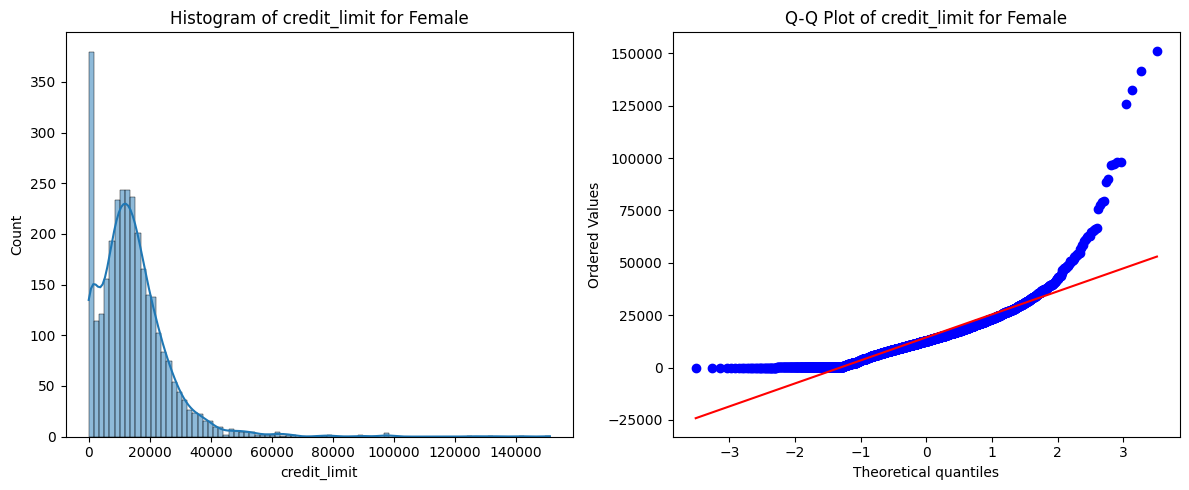

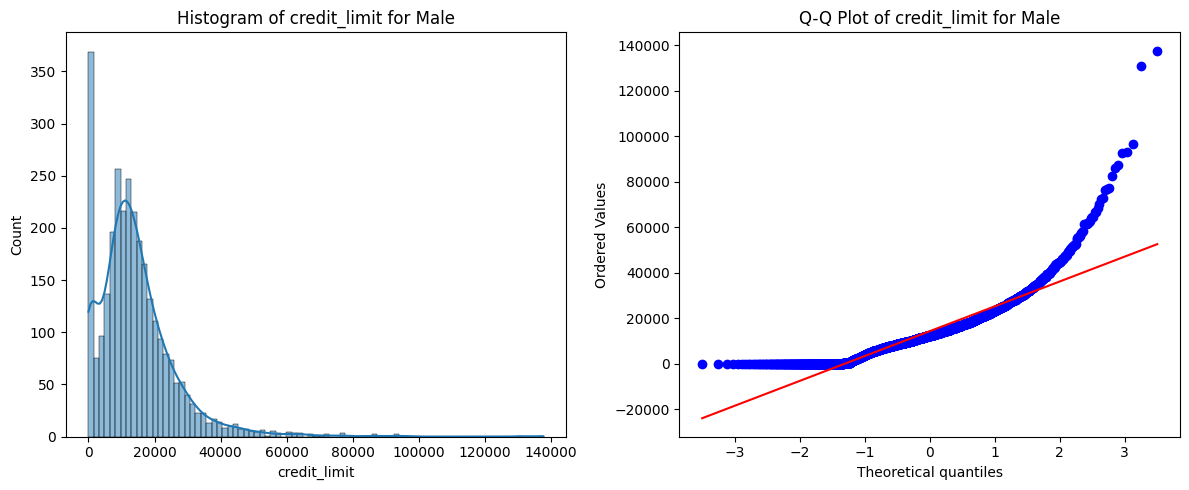


Levene's Test for Equal Variances: p-value = 0.6742

Assumptions for ANOVA are not fully met.
Normality assumption is violated.
Proceeding with the non-parametric Kruskal-Wallis test.

Kruskal-Wallis Test Results:
         Source  ddof1         H    p-unc
Kruskal  gender      1  0.518107  0.47165

=== Analysis Complete ===


In [ ]:
print("\n=== Hypotheses for ANOVA ===")
print("Null Hypothesis (H₀): The mean credit_limit is the same for all gender groups.")
print("Alternative Hypothesis (H₁): At least one gender group has a different mean credit_limit.")

# -------------------------------------------
# 3. Check Assumptions
# -------------------------------------------
print("\n=== Checking Assumptions ===")
# a. Normality: Using Shapiro-Wilk test for each gender group
genders = df_merged['gender'].unique()
normality_results = {}
for gender in genders:
    group_data = df_merged[df_merged['gender'] == gender]['credit_limit'].dropna()
    stat, p = stats.shapiro(group_data)
    normality_results[gender] = p
    print(f"Shapiro-Wilk test for {gender}: p-value = {p:.9f}")

# Plot histograms and Q-Q plots for each group to visually inspect normality
for gender in genders:
    group_data = df_merged[df_merged['gender'] == gender]['credit_limit'].dropna()
    plt.figure(figsize=(12, 5))
    # Histogram with KDE Kernel Density Estimate
    plt.subplot(1, 2, 1)
    sns.histplot(group_data, kde=True)
    plt.title(f"Histogram of credit_limit for {gender}")

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of credit_limit for {gender}")
    plt.tight_layout()
    plt.show()

# b. Equal Variances: Using Levene's test
groups_data = [df_merged[df_merged['gender'] == gender]['credit_limit'].dropna() for gender in genders]
levene_stat, levene_p = stats.levene(*groups_data)
print(f"\nLevene's Test for Equal Variances: p-value = {levene_p:.4f}")

# Evaluate whether the assumptions are met
normality_met = all(p > 0.05 for p in normality_results.values())
equal_variances_met = levene_p > 0.05

# -------------------------------------------
# 4. Perform ANOVA or Non-Parametric Test
# -------------------------------------------
if normality_met and equal_variances_met:
    print("\nAssumptions met. Proceeding with ANOVA.")
    # Perform one-way ANOVA using pingouin
    aov = pg.anova(data=df_merged, dv='credit_limit', between='gender')
    print("\nANOVA Results:")
    print(aov)
        
    # Check the overall p-value from the ANOVA test
    anova_p = aov['p-unc'].values[0]
    if anova_p < 0.05:
        print("\nThe p-value is less than 0.05. Reject the null hypothesis.")
        print("There is a significant difference in mean credit_limit between gender groups.")
        
        # Conduct post-hoc comparisons using Tukey's HSD test
        tukey = pairwise_tukeyhsd(endog=df_merged['credit_limit'], groups=df_merged['gender'], alpha=0.05)
        print("\nTukey's HSD Post-hoc Test:")
        print(tukey.summary())
    else:
        print("\nThe p-value is greater than or equal to 0.05. Fail to reject the null hypothesis.")
        print("There is no significant difference in mean credit_limit between gender groups.")
else:
    print("\nAssumptions for ANOVA are not fully met.")
    if not normality_met:
        print("Normality assumption is violated.")
    if not equal_variances_met:
        print("Equal variances assumption is violated.")
    print("Proceeding with the non-parametric Kruskal-Wallis test.")
        
    # Perform Kruskal-Wallis test
    kruskal = pg.kruskal(data=df_merged, dv='credit_limit', between='gender')
    print("\nKruskal-Wallis Test Results:")
    print(kruskal)

# -------------------------------------------
# 5. Residual Analysis (if ANOVA was used)
# -------------------------------------------
if normality_met and equal_variances_met:
    print("\n=== Residual Analysis ===")
    # Fit a linear model (ANOVA model) for credit_limit by gender
    model = smf.ols(formula='credit_limit ~ C(gender)', data=df_merged).fit()
    residuals = model.resid
    fitted = model.fittedvalues
        
    # Plot residuals vs. fitted values
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=fitted, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Fitted Values")
    plt.show()
        
    # Q-Q Plot of residuals to assess normality
    plt.figure(figsize=(6, 4))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title("Normal Q-Q Plot of Residuals")
    plt.show()
    
# -------------------------------------------
# 6. Summary of Analysis
# -------------------------------------------
print("\n=== Analysis Complete ===")